<a href="https://colab.research.google.com/github/PedemonteGiacomo/DataScienceProject/blob/main/ProgettoIDS_Pedemonte_Giacomo_S4861715_Da_presentare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Progetto Introduzione alla Data Science***


***Pedemonte Giacomo S4861715***

Progetto di Introduzione alla Data Science riguardante l'analisi del dataset contenente le 50 canzoni migliori del 2019.

### **SCOPO DELL'ANALISI**

In questa analisi quindi avremo in mente uno scopo: risponderci alla seguente domanda:
- ***quali sono le caratteristiche che rendono una canzone di successo?***

Per poter risponderci a questa domanda il progetto si suddivide in questi 4 passi:
- ***Descrizione Dataset***;
- ***Esplorazione dei Dati***;
- ***Visualizzazione e Analisi dei Dati***;
- ***MACHINE LEARNING***;

***Importazione librerie per ambiente di lavoro:***

In [1]:
#librerie di visualizzazione
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import plotly.express as px #importazione libreria comoda per la visualizzazione di box plot
import plotly.graph_objects as go #libreria per grafici 3d


#librerie per il machine learning
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
import random

## ***DESCRIZIONE DATASET***

Importazione e visualizzazione della "testa" del database contenente la playlist spotify: top50 del 2019.

In [2]:
top50 = pd.read_csv('top50.csv')
top50.head(3)

,Position,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85


In [3]:
top50.shape

(50, 14)

### **DESCRIZIONE DELLE FEATURES**

Abbiamo quindi ***le migliori 50 canzoni del 2019 su spotify e 14 attributi legati ad esse***:

- **Position** = identificativo della canzone che rappresenta la posizione nella top50 playlist

- **Track.Name** = nome della traccia

- **Artist.name** = nome dell'artista

- **Genre** = genere della traccia

- **Beats.Per.Minute** = il "tempo" della canzone. 

- **Energy** = l'energia di una canzone - maggiore è il valore più la canzone ne ha

- **Danceability** = maggiore è il valore, più è facile da ballare la canzone

- **Loudness..dB** = maggiore è il valore, maggiore è la "rumorosità" della canzone

- **Liveness** = più è alto più è come se fosse una registrazione dal vivo..

- **Valence** = piu è alto il valore, maggiore è il mood positivo della canzone.

- **Length** = lunghezza della canzone/durata.

- **Acousticness** = maggiore è il valore, più la canzone è "acustica"

- **Speechness** = maggiore è il valore, maggiore sarà il numero delle parole utilizzate all'interno della canzone.

- **Popularity** = più è alto il valore, più la canzone sarà popolare.

***PULIZIA DEI DATI***

Prima di tutto, dalla head di prima notiamo che certi attributi vanno "puliti" da caratteri di punteggiatura in eccesso:

In [4]:
top50.rename(columns={"Track.Name":"Track","Artist.Name":"Artist","Beats.Per.Minute":"BPM","Loudness..dB..": "Loudness", "Valence.": "Valence", "Length.":"Length", "Acousticness..":"Acousticness","Speechiness.":"Speechiness"}, inplace = True)

## ***ESPLORAZIONE DEI DATI***

***SUDDIVISIONE FEATURES QUALITATIVE E QUANTITATIVE***

In [5]:
quantitative_top50 = top50[['Position','BPM','Energy','Danceability','Loudness','Liveness','Valence','Length','Acousticness','Speechiness','Popularity']]
qualitative_top50 = top50[['Track','Artist','Genre']]

Visualizziamo con il metodo describe() di pandas alcuni dati statistici come percentile, media e std dei valori numerici del dataframe.

In [6]:
quantitative_top50.describe()

,Position,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


Per le caratteristiche qualitative la describe() ci restituisce una tabella contenente i valori unici, i dati con frequenza più alta.

In [7]:
qualitative_top50.describe()

,Track,Artist,Genre
count,50,50,50
unique,50,38,21
top,Senorita,Ed Sheeran,dance pop
freq,1,4,8


Notiamo da queste describe che non ci sono dati mancanti nel nostro dataset dato che tutti gli attributi hanno count di 50.

## ***VISUALIZZAZIONE  E ANALISI DEI DATI***

Visualizziamo alcune delle features, per estrapolare interessanti informazioni. Per esempio:

- quale è la distribuzione della popolarità tra le canzoni presenti in classifica?
- qual è la popolarità in base al sesso dell'artista?
- qual è il genere più popolare?
- qual è l'artista più popolare?
- Che diversità ci sono tra l'analizzare il genere ed il macrogenere?
- Come si può visualizzare la "distribuzione" del genere e del macro-genere in classifica? box plot

Tutto questo per continuare a provare a risponderci alla domanda iniziale: riusciamo a capire cosa rende una canzone popolare?


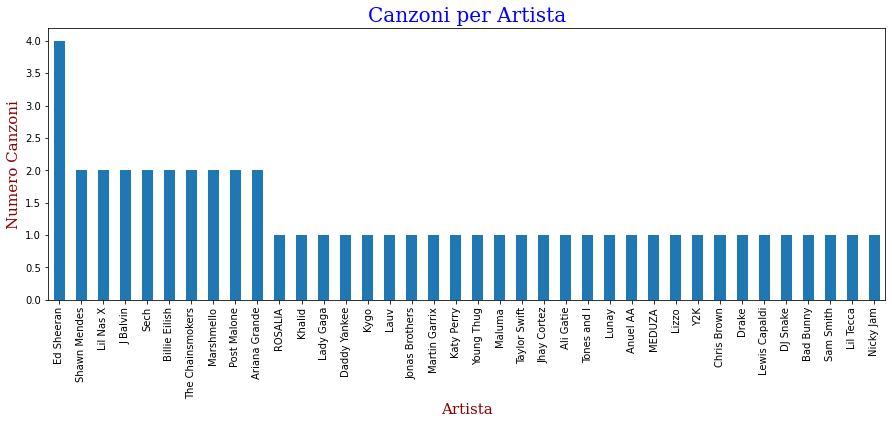

In [8]:
num_artista = top50['Artist'].value_counts()

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Canzoni per Artista", fontdict = font1)
plt.xlabel("Artista", fontdict = font2)
plt.ylabel("Numero Canzoni", fontdict = font2)

num_artista.plot(kind = 'bar',figsize = (15,5))
plt.show()

Ed Sheeran domina la classifica e presenta 4 canzoni all'interno di essa: ma sarà anche l'artista più popolare?

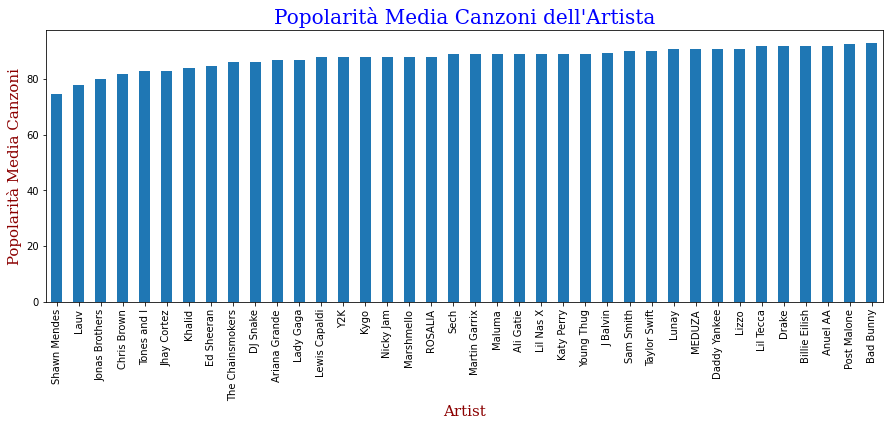

In [9]:
popolarità_artista = top50.groupby('Artist')['Popularity'].mean().sort_values(ascending = True)

plt.title("Popolarità Media Canzoni dell'Artista", fontdict = font1)
plt.xlabel("Artista", fontdict = font2)
plt.ylabel("Popolarità Media Canzoni", fontdict = font2)

popolarità_artista.plot(kind = 'bar',figsize = (15,5))
plt.show()

Notiamo come Ed Sheeran anche se è il cantante che compare di più nella playlist non è quello che ha la media della popolarità delle canzoni più alta, questo primato se lo aggiudica bad bunny con una popolarità media molto alta(circa 92).

Inoltre Shawn Mendes, che è l'artista che presenta la canzone posizionata al primo posto in classifica è l'artista che ha la popolarità media delle sue canzoni più bassa di tutti.

***DISTRIBUZIONE DELLA POPOLARITA'***

Partiamo visualizzando ed analizzando quindi la distribuzione della popolarità nella nostra classifica:

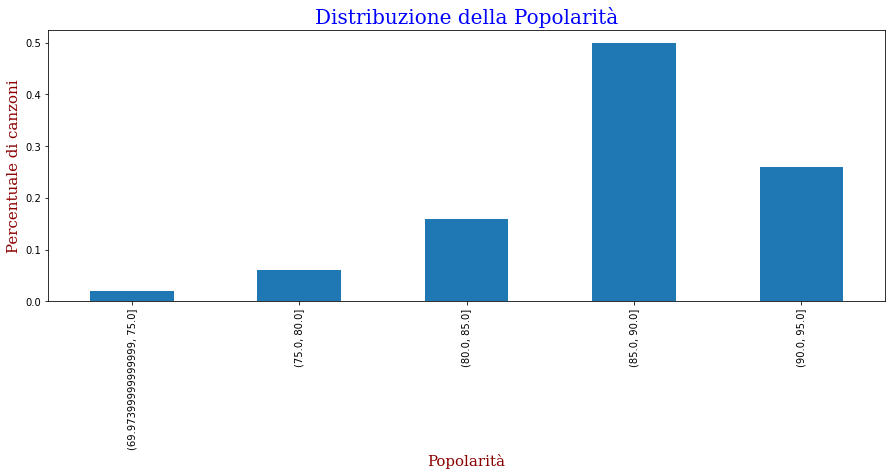

In [10]:
Popularity = top50['Popularity']
Popularity = Popularity.value_counts(bins=5, normalize = True, sort = False)

plt.title("Distribuzione della Popolarità", fontdict = font1)
plt.xlabel("Popolarità", fontdict = font2)
plt.ylabel("Percentuale di canzoni", fontdict = font2)

Popularity.plot(kind = 'bar',figsize = (15,5))
plt.show()

Possiamo quindi notare da questo istogramma sopra riportato che il 50% delle canzoni ha una popolarità compresa tra 85 e 90, ma solo il 25% delle canzoni ha una popolarità superiore al 90% . D'altro canto, solo 1 canzone ha come valore di popolarità un valore minore di 75.

Quindi la maggioranza delle canzoni presenti nel nostro dataset ha popolarità alta.

Verifichiamo come si distribuisce la **POPOLARITA'** in base al *genere*:

In [11]:
fig = px.box(top50, x="Genre", y="Popularity", color="Genre", title="DISTRIBUZIONE POPOLARITA' in base al GENERE")
fig.show()

Vediamo come sia il canadian pop il genere ad avere una la distribuzione di popolarità minore mentre prevalentemente tutti gli altri generi hanno una distribuzione nettamente superiore.

Rap, electropop, e raggaeton risultano avere la mediana di popolarità più alta rispetto agli altri generi.

Possiamo rieffettuare questo tipo di visualizzazione per vedere la distribuzione del **POSIZIONAMENTO** in base al genere:

In [12]:
fig = px.box(top50, x="Genre", y="Position", color="Genre",title="DISTRIBUZIONE POSIZIONE in base al GENERE")
fig.show()

Notiamo subito come, nonostante la poca popolarità del genere riscontrata nel box plot precedente, il canadian pop contenga la canzone prima in classifica e ha un valore di mediana di posizionamento molto alto.

Possiamo inoltre vedere che il pop è il genere con la varianza maggiore di posizionamenti delle canzoni che si distribuiscono pressochè su tutta la classificia. 

Questo in un modo simile alle canzoni appartenenti al genere dance pop anche se la mediana del pop risulta essere più bassa e quindi significa posizionamenti generalmente più bassi del pop rispetto al dance pop.

***AGGIUNTA MACRO GENERE***

In [13]:
top50.Genre.unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [14]:
top50['MacroGenere'] = 'Other'
top50.loc[(top50['Genre'] == 'pop') | (top50['Genre'] == 'canadian pop') | (top50['Genre'] == 'panamanian pop') | (top50['Genre'] == 'australian pop') | (top50['Genre'] == 'pop house') | (top50['Genre'] == 'dance pop') | (top50['Genre'] == 'electropop'), 'MacroGenere'] = 'Pop'
top50.loc[(top50['Genre'] == 'dfw rap') | (top50['Genre'] == 'trap music') |(top50['Genre'] == 'country rap'), 'MacroGenere'] = 'Rap'
top50.loc[(top50['Genre'] == 'reggaeton flow') | (top50['Genre'] == 'reggaeton') | (top50['Genre'] == 'latin') | (top50['Genre'] == 'r&b en espanol'), 'MacroGenere'] = 'Reggaeton'

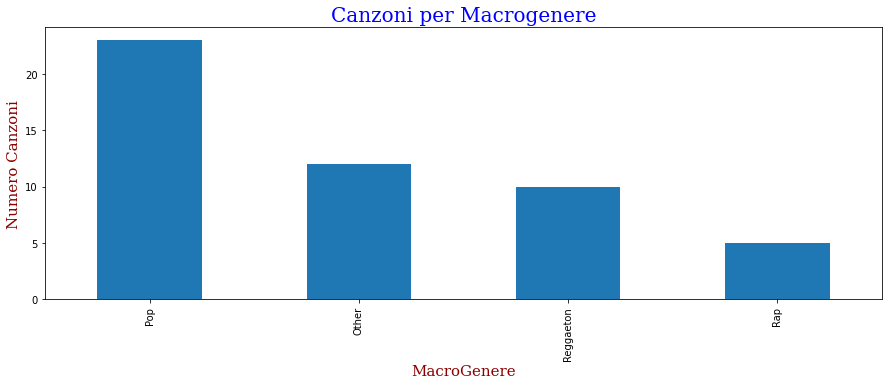

In [15]:
num_macro_genere = top50['MacroGenere'].value_counts()

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Canzoni per Macrogenere", fontdict = font1)
plt.xlabel("MacroGenere", fontdict = font2)
plt.ylabel("Numero Canzoni", fontdict = font2)

num_macro_genere.plot(kind = 'bar',figsize = (15,5))
plt.show()

Con una semplice describe come precedentemente utilizzata per gli altri metodi qualitativi, questa volta, dopo il raggruppamento effettuato, si nota subito come il macro genere più frequente(che quindi contiene più canzoni) è quello pop con ben 23 canzoni presenti in classifica.

Ed ora visualizziamo le **distribuzioni** precedentemente discusse per il genere in base al **MACRO genere**:

In [16]:
fig = px.box(top50, x="MacroGenere", y="Popularity", color="MacroGenere", title="DISTRIBUZIONE POPOLARITA' in base al MACROGENERE")
fig.show()

Vediamo come sia il pop il macro genere ad avere la distribuzione più "corposa": da notare come contenga sia il valore più basso di popolarità(70) che la canzone con il valore più alto(95).

Mentre il rap è il macrogenere che ha la distribuzione della popolarità delle canzoni più alta.

In [17]:
fig = px.box(top50, x="MacroGenere", y="Position", color="MacroGenere", title="DISTRIBUZIONE POSIZIONAMENTO in base al MACROGENERE")
fig.show()

Il Macro genere rap spicca anche in questo box plot distinguendosi come il macro genere con varianza minore(anche dovuto dal numero minore di canzoni presenti rispetto agli altri macro generi) e posizionamento mediano maggiore.

Quindi il macro genere rap è risultato essere il più popolare e il posizionato meglio.

### ***CORRELAZIONE ALLA POPOLARITA***

Ora ci chiediamo, c'e' qualche correlazione tra popolazione e qualcuna delle altre features riportate dal dataset? 
Ad esempio, la lunghezza della canzone, influenza la popolarità delle canzoni? 

Verifichiamolo, calcolando l'**indice di correlazione di Pearson** tra le varie features a disposizione e la popolarità.

Per provare a vedere quindi se c'è una correlazione tra alcune della nostra features e la popolarità visualizziamo la correlazione tra le features con una heatmap e quindi un grafico che segna con colori più caldi le correlazioni più forti tra loro.

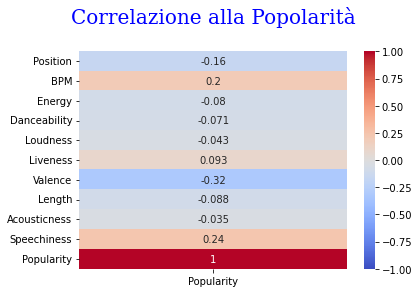

In [18]:
import seaborn as sns #importazione libreria per la heatmap sopra descritta e sotto visualizzata
plt.title("Correlazione alla Popolarità\n", fontdict = font1)
sns.heatmap(top50.corr(method='pearson')[['Popularity']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

Non si è riportata la correlazione di tutta la tabella per risaltare appunto solo la correlazione tra la popolarità e le altre features, in modo appunto da capire direttamente quali sono le più correlate ad essa.

Consideriamo quindi BPM e Speechiness come features correlate positivamente anche se con un bassissimo indice di correlazione.

Mentre prendiamo la Valenza della canzone come unica features correlata negativamente.

Quindi le features più correlate alla popolarità sono: *BPM, SPEECHINESS E VALENCE*.

In [19]:
features_correlate_alla_popolarità = ['BPM','Speechiness','Valence']; #unite per comodità

### ***PRECISAZIONE TEST STATISTICI***

Non è possibile eseguire i test statistici visti a lezione date le seguenti motivazioni:

   - ***T-TEST***:
        - non è possibile rispettare entrambe le condizioni necessarie per eseguire il t-test ovvero:
            - campione di almeno 30 elementi;
            - popolazione di almeno 10 volte superiore il numero di elementi presenti dentro il campione;
   - ***CHI-QUADRATO***:
        - non è possibile rispettare entrambe le condizioni necessarie per eseguire il test del chi-quadrato ovvero:
            - almeno 5 conteggi;
            - popolazione di almeno 10 volte superiore il numero di elementi presenti dentro il campione;
    

# **MACHINE LEARNING**

Il machine learning fornisce predizioni: dobbiamo solo vedere quale usare in base a cosa vogliamo ottenere:
- Apprendimento Non supervisionato
    - Dato un insieme di dati (solo dati/input, niente output), lo scopo del Machine Learning non supervisionato è identificare la presenza di stutture all’interno dei dati stessi.
    - Idea di implementazione : 
        - predirre le canzoni più e meno popolari della classifica.
- Apprendimento Supervisionato :
    - Dato un insieme di coppe input-output, lo scopo del Machine Learning supervisionato è stimare una funzione capace di fittare i dati a disposizione e generalizzare a dati futuri.
    - Idea di implementazione : 
        - predirre la popolarità della canzone a seconda delle features che la caratterizzano. 


### ***APPRENDIMENTO NON SUPERVISIONATO***

In questo caso invece andiamo a rendere il problema della predizione della popolarità un problema di classificazione andando ad individuare e distinguere dalle canzoni con una popolarità alta da quelle con una popolarità bassa:

Questo problema quindi possiamo "risolverlo" utilizzando la tecinca del clustering: ovvero una tecnica per individuare strutture (gruppi di dati "coerenti" rispetto ad una qualche misura) all’interno dei dati:

Due elementi importanti:
- Cluster: è un gruppo di dati che si «comporta in modo analogo»
- Centroide: è il «centro» del cluster (ad esempio il punto medio, o centroide)

Utilizziamo l'algoritmo del Kmeans per effettuare il fitting e la predizione dei dati.

Definiamo la funzione della silhouette per definirci con esattezza il numero di cluster da passare in input al KMeans per ottenere un risultato migliore(crea i centroidi in modo randomico, quindi non tutte le esecuzioni porteranno allo stesso risultato).

Questa funzione ci ritorna quindi un *Silhouette coefficent* = sc il quale viene calcolato effettuando questa operazione:

- (b - a)/max(a,b) = sc 

dove,
- b è la distanza media EXTRA_CLUSTER(più i cluster sono lontani mediamente più otterremo un buon risultato e quindi un coefficente di silhouette alto),
- a è la distanza media INTRA_CLUSTER(più i dati all'interno dei cluster sono vicini mediamente più otterremo un buon risultato e quindi un coefficente di silhouette alto)



In [20]:
def silhouette(x):
    silhouette_avg = []
    for i in range(2, 10):
        kmeans = KMeans(n_clusters = i, max_iter = 10, random_state = 0)
        cluster_labels = kmeans.fit_predict(x)
        silhouette_avg.append(silhouette_score(x, cluster_labels))

    plt.plot(range(2, 10), silhouette_avg,'-o')
    plt.title('The silhouette method\n',  fontdict = font1)
    plt.xlabel('Number of clusters', fontdict = font2)
    plt.ylabel('silhouette coefficient',  fontdict = font2)
    plt.show()

Prendiamo quindi il dataset considerando solo le features che dall'analisi precedente sono risultate le più correlate alla popolarità e standardizziamo il set ottenuto:

In [21]:
X = top50[features_correlate_alla_popolarità]
X = np.asarray(X)
#standardizzo il dataset ristretto alle sole features correlare alla popolarità
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

Ora andiamo ad eseguire la funzione di Silhouette sopra descritta per visualizzare qual'è il miglior numero di cluster da passare come argomento all'algoritmo di k-means(il numeor di cluster associato al silhouette coefficent più alto):

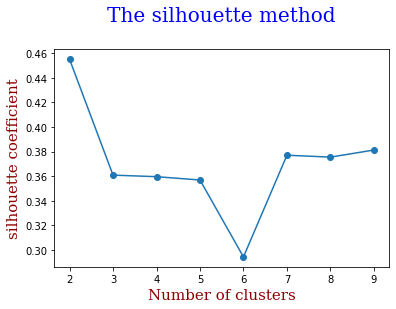

In [22]:
silhouette(X)

Quindi il numero di cluster da usare è 2 con un coefficente di silhouette corrispondente di 0.46.

Andiamo quindi ad eseguire l'algoritmo:

In [23]:
kmeans=KMeans(n_clusters=2, random_state=0).fit(X)
y=kmeans.labels_

Come andiamo quindi a visualizzare il risultato? Prima di tutto assegnamo questa y ottenuta, ovvero le etichette dei cluster ottenuti ed associamole al nostro dataset aggiungendo appunto la colonna cluster:

In [24]:
top50['cluster'] = y

Ora con un diagramma a dispersione su 3 dimensioni, ovvero le 3 features usate per ottenere questi 2 gruppi di dati distinti, visualizziamo appunto l'effetto di questa clusterizzazione e cerchiamo di capire appunto se siamo riusciti ad ottenere due "gruppi di dati" distinti:

In [25]:
PLOT = go.Figure()

for C in list(top50.cluster.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = top50[top50.cluster == C]['BPM'],
                                y = top50[top50.cluster == C]['Speechiness'],
                                z = top50[top50.cluster == C]['Valence'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))

PLOT.update_layout(width = 900, height = 500, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BPM', titlefont_color = 'black'),
                                yaxis=dict(title = 'Speechiness', titlefont_color = 'black'),
                                zaxis=dict(title = 'Valence', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12),
                   title = "Visualizzazione Cluster sulle 3 features usate: BPM(asse x), Valence(asse y), Speechinees(asse z)")

Effettivamente si riescono proprio a distinguere due gruppi di dati distinti e quindi possiamo ritenerci soddisfatti della clusterizzazione ottenuta.

Per avere un ulteriore riscontro di ciò visualizzato sopra andiamo a vedere se siamo riusciti a "staccare" la features di popolarità dalle sue correlate e quindi se siamo effettivamente riusciti ad ottenere due gruppi di dati distinti per quanto riguarda la popolarità.

Saremo quindi contenti se otteniamo due cluster ben distinti in cui in uno sono contenute le canzoni meno popolari in classifica e nell'altro le canzoni più popolari:

In [26]:
fig = px.box(top50, x="cluster", y="Popularity", color="cluster", title="Popolarità in base ai Cluster generati")
fig.show()

Vediamo anche da questo box plot quindi che siamo riusciti a separare la popolarità dalle features che abbiamo usato per ottenere questa predizione su insiemi di dati comuni: ciò ci da quindi la possibilità di ottenere due cluster:
- cluster 0 dove vi sono canzoni meno popolari rispetto all'altro cluster;
- cluster 1 che invece contien canzoni prevalentemente più popolari rispetto appunto all'altro cluster.

### ***APPRENDIMENTO SUPERVISIONATO***

Utilizziamo quindi l'apprendimento supervisionato per vedere se riusciamo a predirre la popolarità della canzone a seconda delle features che la caratterizzano.

Utilizziamo il calcolo degli errori sulle predizioni confrontandole con un modello nullo per vedere quante caratteristiche dobbiamo utilizzare per riuscire a predirre con maggiore successo appunto questa proprietà

Alleniamo quindi un modello di regressione lineare. 

Ricordate che dobbiamo dividere il dataset a disposizione in due diversi gruppi:

- Training Set
- Validation Set

Eseguiamo 70/30 per training/test.

Andiamo quindi a calcolarci questi errori che ci permetteranno di valutare i modelli a regressione di machine learning:

- lo scarto medio assoluto (MAE - Mean Absolute Error);
- l’errore quadratico medio (MSE - Mean Squared Error);
- la radice dell’errore quadratico medio (RMSE - Root of Mean Squared Error).

In [27]:
def MSE (y_pred,y_true):
    return 1/y_pred.shape[0]*np.sum((y_pred-y_true)**2)
def MAE (y_pred,y_true):
    return 1/y_pred.shape[0]*np.sum(np.abs(y_pred-y_true))
def RMSE (y_pred,y_true):
    return np.sqrt(1/y_pred.shape[0]*np.sum((y_pred-y_true)**2))

Adesso possiamo usare il modello imparato, per effettuare predizioni sul validation set. E' sufficiente usare la funzione predict sull'oggetto restituito da fit, passando come argomento x_valid

Verifichiamo se si può effettuare questa predizione con più features, successivamente con le features correlate prese insieme.

In [28]:
#utilizzare tutte le features insieme
features = np.asarray(list(quantitative_top50.columns))[1:quantitative_top50.shape[1]-1]
print(features)
x = top50[features]
y = top50['Popularity']
regressor = LinearRegression()
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3,  random_state = 10)
lin_reg = regressor.fit(x_train, y_train)
y_pred = lin_reg.predict(x_valid)
print('\nCon tutte le features a nostra disposizione:\n')
print('MAE:', MAE(y_pred,y_valid))
print('MSE:', MSE(y_pred,y_valid))
print('RMSE:', RMSE(y_pred, y_valid))


#features correlate alla popolarità, insieme
print('\nSolo con le features correlate trovate nella analisi precedente:\n')
print(features_correlate_alla_popolarità)
x = top50[features_correlate_alla_popolarità]
y = top50['Popularity']
regressor = LinearRegression()
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3,  random_state = 10)
lin_reg = regressor.fit(x_train, y_train)
y_pred = lin_reg.predict(x_valid)
print('MAE:', MAE(y_pred,y_valid))
print('MSE:', MSE(y_pred,y_valid))
print('RMSE:', RMSE(y_pred, y_valid))

['BPM' 'Energy' 'Danceability' 'Loudness' 'Liveness' 'Valence' 'Length'
 'Acousticness' 'Speechiness']

Con tutte le features a nostra disposizione:

MAE: 4.589901697647539
MSE: 34.88193531379405
RMSE: 5.906093066807706

Solo con le features correlate trovate nella analisi precedente:

['BPM', 'Speechiness', 'Valence']
MAE: 2.877948501776448
MSE: 13.61125201396483
RMSE: 3.6893430328399703


Possiamo notare subito come l'errore diminuisce con l'uso delle features che prima sono risultate essere le più correlate alla popolarità.

Bisogna comunque precisare che data la scarsità di dati a nostra disposizione questi valori sopra raccolti "sballano" molto di esecuzione in esecuzione proprio perchè i dati vengono splittati al 70% nel training test e il 30% nel validation test in modo completamente casuale.

E ora con le features correlate una alla volta

BPM :
intercept: 84.37300588037397
coefficient: [0.02492158]
MAE: 2.741935990749343
MSE: 11.829668657730775
RMSE: 3.4394285365058503 

Speechiness :
intercept: 85.78458475447557
coefficient: [0.13350849]
MAE: 2.938471748508142
MSE: 14.080034646060911
RMSE: 3.752337224459032 

Valence :
intercept: 91.15749512555108
coefficient: [-0.06963338]
MAE: 2.8796683987368565
MSE: 12.327602460926675
RMSE: 3.5110685639740327 



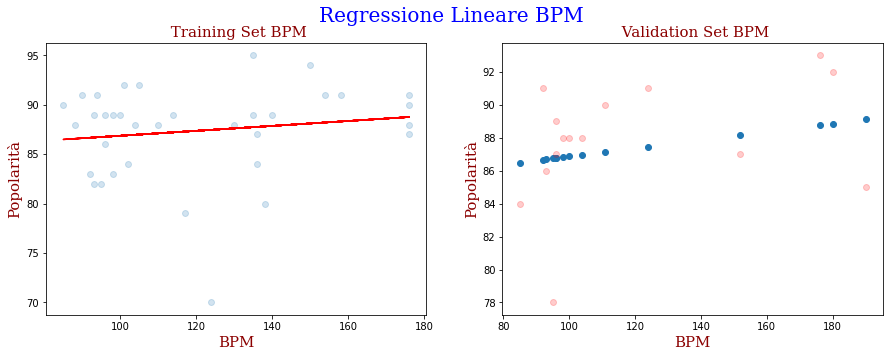

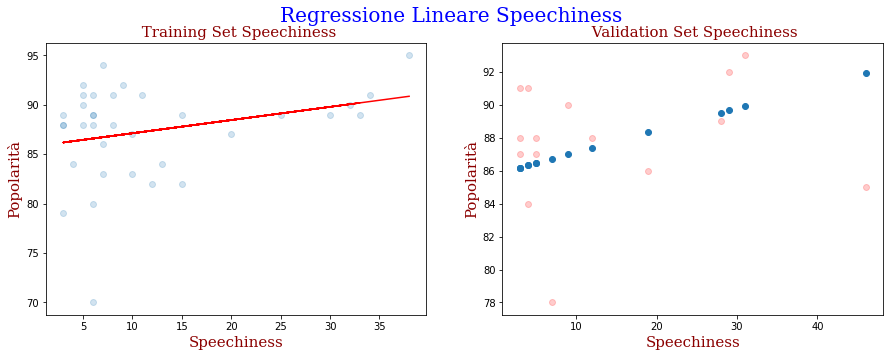

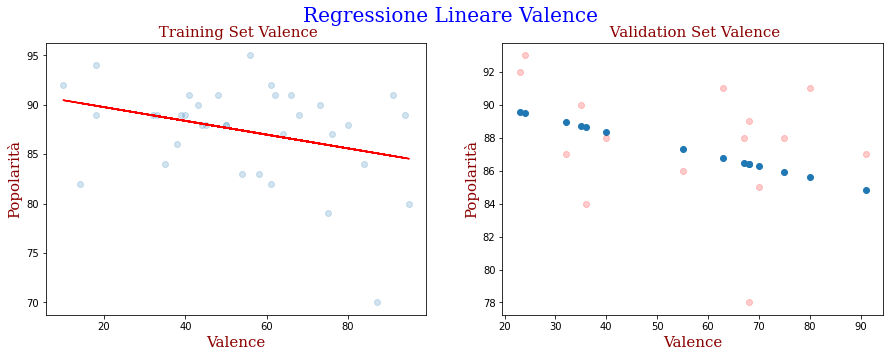

In [29]:
for i in range(0, len(features_correlate_alla_popolarità)):
    features = features_correlate_alla_popolarità[i]
    x = top50[[features]]
    y = top50['Popularity']
    X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 10)

    regressor = LinearRegression()
    lin_reg = regressor.fit(X_train, y_train)
    
    print(features,':')
    print('intercept:', lin_reg.intercept_)
    print('coefficient:', lin_reg.coef_)
    
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax.scatter(X_train, y_train, alpha = 0.2)
    y_hat = X_train*lin_reg.coef_ + lin_reg.intercept_
    ax.plot(X_train, y_hat, color='r')
    ax.set_ylabel("Popolarità", fontdict = font2)
    ax.set_xlabel(features, fontdict = font2)
    ax.set_title("\n Training Set " + features, fontdict = font2)
    
    
    y_hat = regressor.predict(X_valid)
    ax2.scatter(X_valid, y_hat)
    ax2.scatter(X_valid, y_valid, c = 'r', alpha = 0.2)
    ax2.set_ylabel("Popolarità", fontdict = font2)
    ax2.set_xlabel(features, fontdict = font2)
    ax2.set_title("\n Validation Set " + features, fontdict = font2)
    
    f.suptitle('Regressione Lineare ' + features, fontdict = font1, fontsize = 20)
    
    #calcoliamo le predizioni sul validation set (y_pred)
    y_pred = regressor.predict(X_valid)
    print('MAE:', MAE(y_pred,y_valid))
    print('MSE:', MSE(y_pred,y_valid))
    print('RMSE:', RMSE(y_pred,y_valid),'\n')

Gli errori quindi trovati in precedenza ora devono essere confrontati con il modello nullo per vedere quali predizioni poter "accettare":

In [30]:
#calcoliamo la popolarità media
popolarità_media = top50['Popularity'].mean()

# create la nuova x con lo stesso numero di campioni del dataset originale, e con tutti i valori uguali al valore medio del diametro appena calcolato
null_model_y = [popolarità_media] * top50.shape[0]

# valutiamo il modello nullo usando le funzioni implementate 
print ('MAE:', metrics.mean_absolute_error(y, null_model_y))
print ('MSE:', metrics.mean_squared_error(y, null_model_y))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y, null_model_y)))

MAE: 3.24
MSE: 19.77
RMSE: 4.446346815083142


Traiamo quindi le nostre ***conclusioni***:
- ***tra le features correlate prendendole una ad una*** : BPM, Speechiness e Valenza, andandole ad esaminare e plottare confrontandole una ad una, restituiscono un errore minore all'errore prodotto nel modello nullo quindi possiamo accettare la predizione della popolarità effettuata su queste features prese una alla volta.
- ***con l'utilizzo di tutte le features quantitative a nostra disposizione nel dataset tranne la popolarità*** : si ottiene un errore più alto rispetto all'errore riscontrato nel modello nullo e quindi è da scartare l'utilizzo di queste features per ottenere la predizione della popolarità;
- ***usando le sole features correlate alla popolarità insieme*** : Anche in questo caso l'errore ottenuto è minore a quello ottenuto nel modello nullo.

### *CONCLUSIONE*

Ricapitolando: nell'elaborazione e visualizzazione iniziale del dataset a nostra disposizione sono emersi dati interessanti come:
- l'artista più presente in classifica: Ed Sheeran che però non risulta essere l'artista con le canzoni più popolari mediamente.
- l'artista con le canzoni mediamente meno popolari: Shawn Mendes, il quale però e l'artista che presenta la canzone prima in classifica.
- il genere ed il macrogenere più presenti all'interno della classifica, ovvero il dance pop e il pop rispettivamente.
- la distribuzione della popolarità delle canzoni in generale(divisone in bins), in base al genere, in base al macrogenere, in base al sesso dell'artista dalle quali abbiamo estrapolato le informazioni descritte precedentemente.
- quali features effettivamente fossero collegate alla popolarità per andare cosi ad effettuare il machine learning sopra riportato portandoci dietro appunto queste informazioni estratte dall'analisi effettuata

Per concludere la nostra analisi dobbiamo ancora vedere se siamo riusciti a rispondere alla domanda dalla quale è iniziato tutto: *quali sono le caratteristiche che rendono una canzone di successo?*

Possiamo dire che non siamo riusciti direttamente a capire quali sono gli attributi e quindi le caratteristiche appunto che rendono una canzone più o meno popolare ma siamo riusciti ad ottenere informazioni sulle features più correlate alla popolarità riuscendo cosi ad allenare due modelli di machine learning:
- Supervisionato, implementato attraverso l'utilizzo della regressione lineare ottenendo con successo una predizione della popolarità utilizzando le features che dall'elaborazione dei dati sono risultate essere appunto le più correlate come detto in precedenza.
- Non supervisionato, realizzato con la clusterizzazione per risolvere il problema di classificazione per ottenere una divisione del nostro dataset in canzoni più popolari e canzoni meno popolari. Anche in questo caso si sono utilizzate solo le features più correlate alla popolarità per ottenere appunto "gruppi di dati coesi" visualizzati attraverso un plot in tre dimensioni, corrispondenti alle features utilizzate proprio per la divisione in cluster. Con il box plot si può apprezzare come effettivamente siamo riusciti ad ottenere due gruppi di dati che si differenziano proprio per la popolarità.

